\begin{center} 
Chun-Yuan (Scott) Chiu 
\end{center}
\begin{center} 
chunyuac@andrew.cmu.edu 
\end{center}

# 1. {-}

## (a) {-}

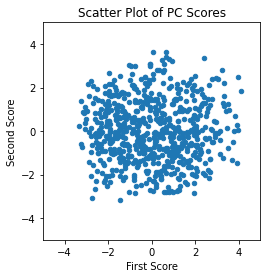

In [32]:
from sklearn.decomposition import PCA
from pandas import DataFrame
import pandas as pd
import matplotlib.pyplot as plt

threes = pd.read_csv('threes.csv')
# threes -= threes.mean()

fig, ax = plt.subplots(1, 1)
score = DataFrame(PCA(n_components=2).fit_transform(threes), columns=['First', 'Second'])
score.plot(kind='scatter', x='First', y='Second', ax=ax)
ax.set(aspect=1, xlim=(-5, 5), ylim=(-5, 5), title='Scatter Plot of PC Scores', xlabel='First Score', ylabel='Second Score')
plt.show()

## (b) {-}

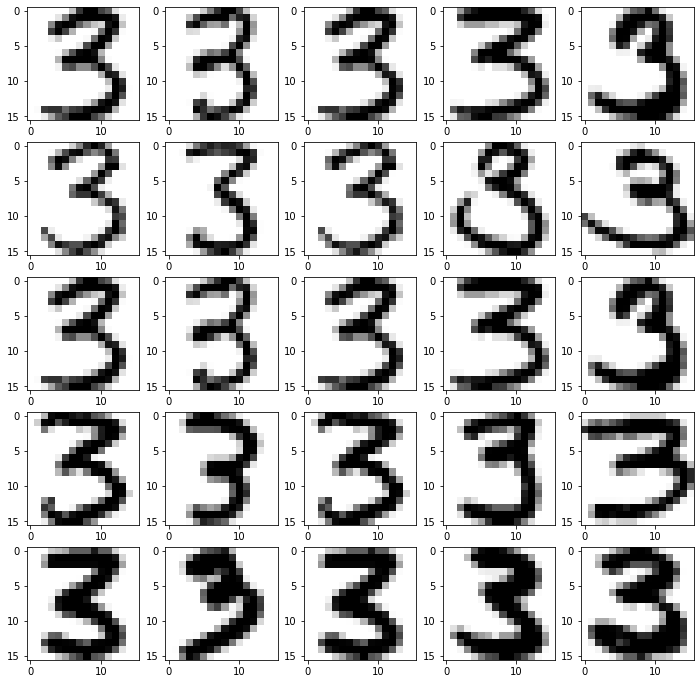

In [30]:
from quantile_helper import quantile_grid

indices = quantile_grid(score['First'], score['Second'], [0.5, 0.25, 0.5, 0.75, 0.95])

fig, axs = plt.subplots(5, 5, figsize=(12, 12))
for idx, ax in zip(indices.ravel(), axs.ravel()):
    ax.imshow(-threes.iloc[idx].values.reshape(16, 16), cmap='gray')
    
plt.show()

## (c) {-}

* PC1: wider
* PC2: bold

## (d) {-}

In [70]:
from pandas import Series

pca_fit = PCA(n_components=256).fit(threes)

scree = Series(pca_fit.explained_variance_ratio_.cumsum())
scree.index = scree.index + 1

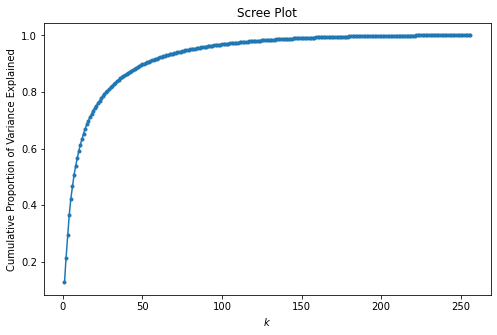

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
s.plot(style='.-', ax=ax)
ax.set(xlabel='$k$', ylabel='Cumulative Proportion of Variance Explained', title='Scree Plot')
plt.show()

In [56]:
s[s > 0.5].index[0], s[s > 0.9].index[0]

(7, 52)

## (e) {-}

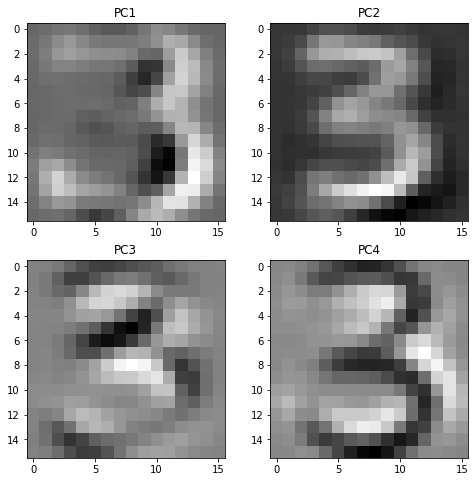

In [64]:
from quantile_helper import quantile_grid

fig, axs = plt.subplots(2, 2, figsize=(8, 8))
for i, ax in enumerate(axs.ravel()):
    ax.imshow(pca_fit.components_[i].reshape(16, 16), cmap='gray')
    ax.set(title='PC%s'%(i+1))
    
plt.show()

# 2. {-}

## (a) {-}

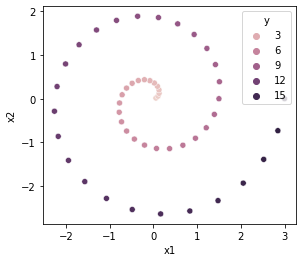

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

spiral = pd.read_csv('spiral.csv')

fig, ax = plt.subplots(1, 1)
sns.scatterplot(data=spiral, x='x1', y='x2', hue='y', ax=ax)
ax.set(aspect=1)
plt.show()